In [4]:
# Initiate the HOD instance with parameter file test_fit_param.yaml
import sys
sys.path.insert(0, '/global/homes/s/shengyu/.local/perlmutter/python-3.11/lib/python3.11/site-packages')
import copy
import yaml
import numpy as np
import matplotlib.pyplot as plt
from HODDIES import HOD
sys.path.append('/global/homes/s/shengyu/project_rc/main/Y3/')
from helper import REDSHIFT_VSMEAR, REDSHIFT_ABACUS_Y3

Z_VSMEAR = REDSHIFT_VSMEAR 
Z_CUBIC = REDSHIFT_ABACUS_Y3

In [2]:
#Plot best fit from a precomputed bes fit run 
tracer = 'LRG'
z_simu = Z_CUBIC[tracer][0]
(zmin, zmax) = Z_VSMEAR[tracer][0]
args_hod = yaml.load(open(f'../parameter_files/{tracer}_HOD_fit_param.yaml', 'r'), Loader=yaml.FullLoader)
args_hod['tracers'] = [tracer]
args_hod['hcat']['Abacus']['z_simu'] = z_simu
args_hod['fit_param']['zmin'] = zmin
args_hod['fit_param']['zmax'] = zmax
for sys_model in ['standard']:
    if sys_model == 'standard':
        args_hod['fit_param']['use_vsmear'] = False
    elif sys_model == 'dv-obs':
        args_hod['fit_param']['use_vsmear'] = True
    args_copy = copy.deepcopy(args_hod)
HOD_obj = HOD(args=args_copy, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
HOD_obj.ngal('LRG')

Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.500 ...
Done took 00:00:09
Compute columns...
Done took  00:00:01
AbacusSummit_highbase_c000_ph100 at 0.5 loaded, took 00:00:10
Initialize Abacus c000 cosmology


(1234230.1306529162, 0.24997322257435112)

Load data vector for LRG
Load rppi measurements at z0.4-0.6 for LRG...
Load smu measurements at z0.4-0.6 for LRG...
Best fit point: ('M_0_LRG', np.float64(12.772683266798857)) ('M_1_LRG', np.float64(13.86445705422271)) ('alpha_LRG', np.float64(1.030227847219731)) ('f_sigv_LRG', np.float64(0.8866657009092258)) ('log_Mcent_LRG', np.float64(12.81081697779473)) ('sigma_M_LRG', np.float64(0.41006254344902815))
Create mock catalog for ['LRG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 1.5456774234771729
Start satellite assignement


/global/homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/HODDIES/utils.py:499: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../../../../../../../../homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/HODDIES/utils.py", line 415:
@njit(fastmath=True)
def get_etavir_nfw(c): 
^

  etaVir = get_etavir_nfw(c[i])*nfw_rescale
/global/homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../../../../../../../../homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/HODDIES/utils.py", line 487:
def compute_fast

Satellite assignement done 3.232353925704956
LRG mock catalogue done 3.315704345703125
614254 central galaxies, 85696 satellites, fraction of satellite 0.12 
Done overall time  LRG 5.246232509613037


(804778.8271385727, 0.12297208073475549)

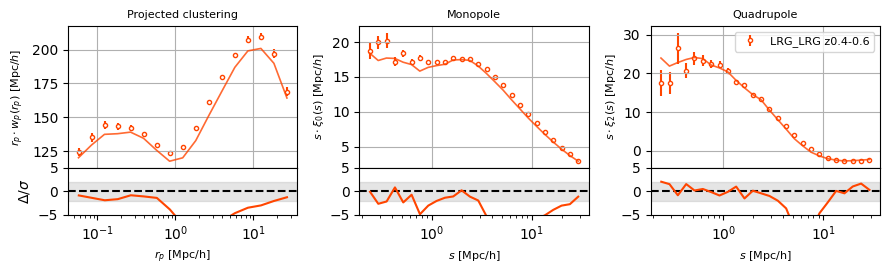

In [3]:
# HOD_obj.initialize_fit(fix_seed=10)
bf_file_fn = f'/pscratch/sd/s/shengyu/galaxies/hod/fit/results/minimiser/LRG/fitmini_LRG_z{zmin:.1f}-{zmax:.1f}_{sys_model}_00.npy'
HOD_obj.plot_bf_data(bf_file = bf_file_fn)
HOD_obj.ngal('LRG')

In [ ]:
#Plot best fit from a precomputed bes fit run 
tracer = 'LRG'
z_simu = Z_CUBIC[tracer][0]
(zmin, zmax) = Z_VSMEAR[tracer][0]
args_hod = yaml.load(open('./HOD_fit_param.yaml', 'r'), Loader=yaml.FullLoader)
args_hod['tracers'] = [tracer]
args_hod['hcat']['Abacus']['z_simu'] = z_simu
args_hod['fit_param']['zmin'] = zmin
args_hod['fit_param']['zmax'] = zmax
args_hod['fit_param']['zmax'] = zmax
for sys_model in ['standard','dv-obs']:
    if sys_model == 'standard':
        args_hod['fit_param']['use_vsmear'] = False
    elif sys_model == 'dv-obs':
        args_hod['fit_param']['use_vsmear'] = True
    args_copy = copy.deepcopy(args_hod)
    HOD_obj = HOD(args=args_copy, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
    HOD_obj.initialize_fit(fix_seed=10)
    bf_file_fn = f'/global/homes/s/shengyu/project_rc/main/Y3/hod_test/results/minimiser/fitmini_LRG_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
    HOD_obj.plot_bf_data(bf_file = bf_file_fn)

Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.500 ...


In [ ]:
bf_file_fn = f'/global/homes/s/shengyu/project_rc/main/Y3/hod_test/results/minimiser/fitmini_LRG_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
HOD_obj.plot_bf_data(bf_file = bf_file_fn)

Load data vector for LRG
Load rppi measurements at z0.4-0.6 for LRG...
Load smu measurements at z0.4-0.6 for LRG...


KeyError: 'LRG'

In [ ]:
#Plot best fit from a precomputed bes fit run 
tracer = 'QSO'
z_simu = Z_CUBIC[tracer][0]
(zmin, zmax) = Z_VSMEAR[tracer][0]
args_hod = yaml.load(open('./HOD_fit_param.yaml', 'r'), Loader=yaml.FullLoader)
args_hod['tracers'] = [tracer]
args_hod['hcat']['Abacus']['z_simu'] = z_simu
args_hod['fit_param']['zmin'] = zmin
args_hod['fit_param']['zmax'] = zmax
args_hod['fit_param']['zmax'] = zmax
for sys_model in ['standard','dv-obs']:
    if sys_model == 'standard':
        args_hod['fit_param']['use_vsmear'] = False
    elif sys_model == 'dv-obs':
        args_hod['fit_param']['use_vsmear'] = True
    args_copy = copy.deepcopy(args_hod)
    HOD_obj = HOD(args=args_copy, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
    HOD_obj.initialize_fit(fix_seed=10)
    bf_file_fn = f'/global/homes/s/shengyu/project_rc/main/Y3/hod_test/results/minimiser/fitmini_LRG_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
    HOD_obj.plot_bf_data(bf_file = bf_file_fn)

Set number of threads to 32
Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 ...


In [5]:
#Plot best fit from a precomputed bes fit run 
tracer = 'LRG'
z_simu = Z_CUBIC[tracer][1]
(zmin, zmax) = Z_VSMEAR[tracer][1]
args_hod = yaml.load(open('./HOD_fit_param.yaml', 'r'), Loader=yaml.FullLoader)
args_hod['tracers'] = [tracer]
args_hod['hcat']['Abacus']['z_simu'] = z_simu
args_hod['fit_param']['zmin'] = zmin
args_hod['fit_param']['zmax'] = zmax
args_hod['fit_param']['zmax'] = zmax
for sys_model in ['standard','dv-obs']:
    if sys_model == 'standard':
        args_hod['fit_param']['use_vsmear'] = False
    elif sys_model == 'dv-obs':
        args_hod['fit_param']['use_vsmear'] = True
    args_copy = copy.deepcopy(args_hod)
    HOD_obj = HOD(args=args_copy, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
    HOD_obj.initialize_fit(fix_seed=10)
    bf_file_fn = f'/global/homes/s/shengyu/project_rc/main/Y3/hod_test/results/minimiser/fitmini_LRG_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
    HOD_obj.plot_bf_data(bf_file = bf_file_fn)

Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.725 ...
Done took 00:00:23
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 0.725 loaded, took 00:00:24
Initialize Abacus c000 cosmology
Load data vector for LRG
Load rppi measurements at z0.6-0.8 for LRG...
Load smu measurements at z0.6-0.8 for LRG...
Load correlation matrix for LRG at z0.725 ...
Load data vector for LRG
Load rppi measurements at z0.6-0.8 for LRG...
Load smu measurements at z0.6-0.8 for LRG...


KeyError: 'LRG'

Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 ...
Done took 00:00:23
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 0.95 loaded, took 00:00:23
Initialize Abacus c000 cosmology
Load data vector for LRG
Load rppi measurements at z0.8-1.1 for LRG...
Load smu measurements at z0.8-1.1 for LRG...
Load correlation matrix for LRG at z0.95 ...
Load data vector for LRG
Load rppi measurements at z0.8-1.1 for LRG...
Load smu measurements at z0.8-1.1 for LRG...
Best fit point: ('M_0_LRG', np.float64(12.527664873882433)) ('M_1_LRG', np.float64(13.765816182930113)) ('alpha_LRG', np.float64(1.0189794488747193)) ('f_sigv_LRG', np.float64(0.9921011909814224)) ('log_Mcent_LRG', np.float64(12.871979998820239)) ('sigma_M_LRG', np.float64(0.5390831399435424))
Create mock catalog for ['LRG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 0.5795989036560059
Start satellite assignement
Satellite assignement d

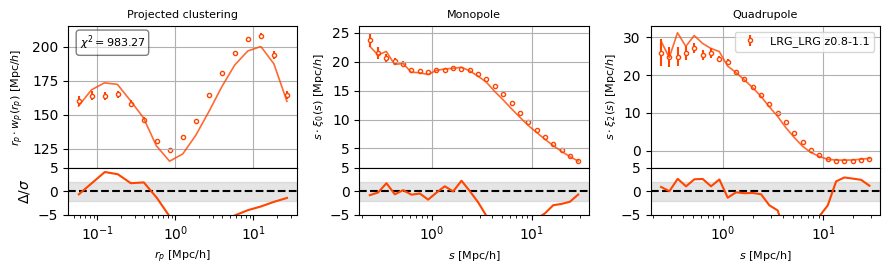

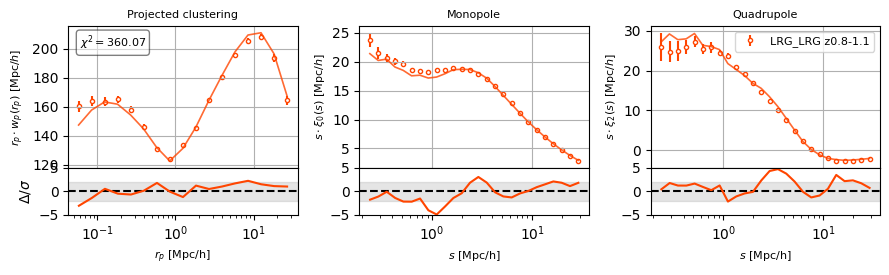

In [ ]:
#Plot best fit from a precomputed bes fit run 
tracer = 'LRG'
z_simu = Z_CUBIC[tracer][0]
(zmin, zmax) = Z_VSMEAR[tracer][0]
args_hod = yaml.load(open('./HOD_fit_param.yaml', 'r'), Loader=yaml.FullLoader)
args_hod['tracers'] = [tracer]
args_hod['hcat']['Abacus']['z_simu'] = z_simu
args_hod['fit_param']['zmin'] = zmin
args_hod['fit_param']['zmax'] = zmax
args_hod['fit_param']['zmax'] = zmax
for sys_model in ['standard','dv-obs']:
    if sys_model == 'standard':
        args_hod['fit_param']['use_vsmear'] = False
    elif sys_model == 'dv-obs':
        args_hod['fit_param']['use_vsmear'] = True
    args_copy = copy.deepcopy(args_hod)
    HOD_obj = HOD(args=args_copy, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
    HOD_obj.initialize_fit(fix_seed=10)
    bf_file_fn = f'/global/homes/s/shengyu/project_rc/main/Y3/hod_test/results/minimiser/fitmini_LRG_z{zmin:.1f}-{zmax:.1f}_{sys_model}.npy'
    HOD_obj.plot_bf_data(bf_file = bf_file_fn)

In [33]:
a = np.load('/pscratch/sd/s/shengyu/galaxies/hod/Y3/minimiser/fitmini_LRG_z0.4-0.6_standard.npy', allow_pickle=True)

In [29]:
HOD_obj.initialize_fit()

Load data vector for LRG
Load rppi measurements at z0.4-0.6 for LRG...
Load smu measurements at z0.4-0.6 for LRG...
Load correlation matrix for LRG at z0.5 ...
